In [3]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.8/390.3 MB 12.6 MB/s eta 0:00:31
    --------------------------------------- 5.5/390.3 MB 16.0 MB/s eta 0:00:25
   - -------------------------------------- 10.0/390.3 MB 17.7 MB/s eta 0:00:22
   - -------------------------------------- 14.4/390.3 MB 18.9 MB/s eta 0:00:20
   - -------------------------------------- 19.4/390.3 MB 19.7 MB/s eta 0:00:19
   -- ------------------------------------- 24.1/390.3 MB 20.1 MB/s eta 0:00:19
   -- ------------------------------------- 28.8/390.3 MB 20.3 MB/s eta 0:00:18
   --- ------------------------------------ 33.8/390.3 MB 20.6 MB/s eta 0:00:18
   ---- ----------------------------------- 39.1/390.3 MB 21.0 MB/s eta 0:00:17
   ---- ----------------------------------- 43.3/390.3 MB 21.2 MB/s eta 0:00:17
   ---- ----------------------------------- 48.5/390.3 MB 21.4 MB/s eta 0:00:16
   ----- ---------------------------------- 53.5/39

Training data directory: True
Test data directory: True
Found 4505 images belonging to 2 classes.
Found 57437 images belonging to 1 classes.
Found 4505 training images.
Found 57437 test images.
Train batch shape: (32, 150, 150, 3)
Test batch shape: (32, 150, 150, 3)


C:\Users\Arul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Arul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.6133 - loss: 1.2014 - val_accuracy: 0.5349 - val_loss: 0.8327
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 125s 888ms/step - accuracy: 0.7760 - loss: 0.4842 - val_accuracy: 0.4012 - val_loss: 1.2115
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 104s 743ms/step - accuracy: 0.7930 - loss: 0.4544 - val_accuracy: 0.6866 - val_loss: 0.6310
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 108s 768ms/step - accuracy: 0.8414 - loss: 0.3705 - val_accuracy: 0.7156 - val_loss: 0.5187
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 116s 824ms/step - accuracy: 0.8858 - loss: 0.3005 - val_accuracy: 0.4035 - val_loss: 1.4541
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 116s 826ms/step - accuracy: 0.9150 - loss: 0.2209 - val_accuracy: 0.5661 - val_loss: 1.0064
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 108s 769ms/step - accuracy: 0.9464 - loss: 0.1512 - val_accuracy: 0.5089 - val_loss: 1.9117


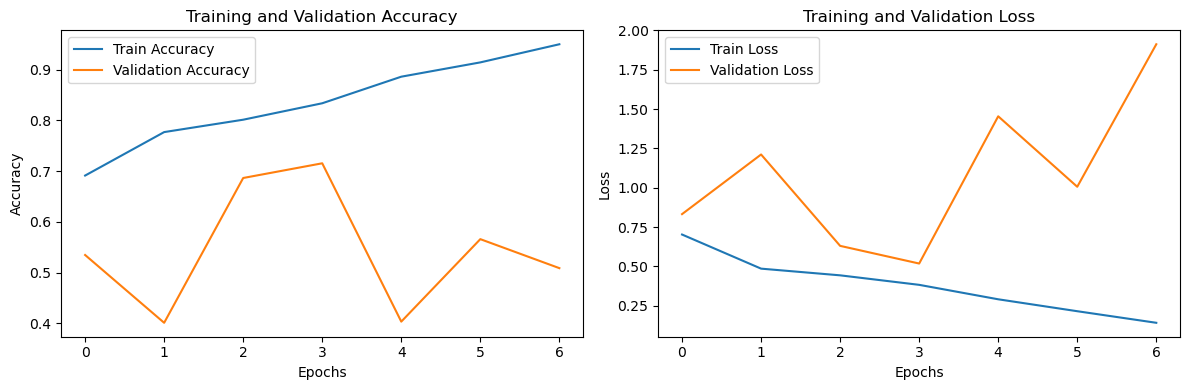

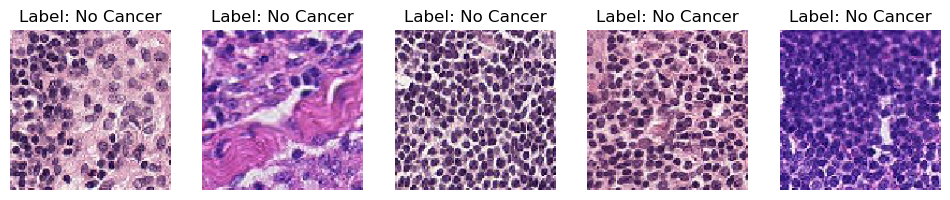

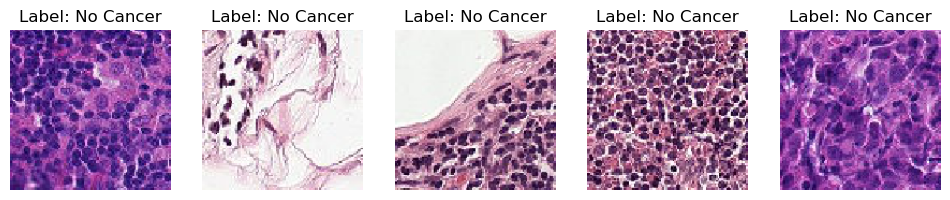

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_dir = r"D:\Cancer_Dataset\train"
test_dir = r"D:\Cancer_Dataset\test"

print("Training data directory:", os.path.isdir(train_dir))
print("Test data directory:", os.path.isdir(test_dir))

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Found", train_generator.samples, "training images.")
print("Found", test_generator.samples, "test images.")

try:
    train_batch = next(train_generator)
    print("Train batch shape:", train_batch[0].shape)  
    test_batch = next(test_generator)
    print("Test batch shape:", test_batch[0].shape)  
except Exception as e:
    print("Error while loading batches:", str(e))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

model.save('cancer_cell_detection_model.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

def plot_sample_images(generator, num_images=5):
    images, labels = next(generator) 
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Label: {"Cancer" if labels[i] == 1 else "No Cancer"}')
        plt.axis('off')
    plt.show()

plot_sample_images(train_generator, num_images=5)

plot_sample_images(test_generator, num_images=5)


In [ ]:

    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Found", train_generator.samples, "training images.")
print("Found", test_generator.samples, "test images.")

try:
    train_batch = next(train_generator)
    print("Train batch shape:", train_batch[0].shape)  
    test_batch = next(test_generator)
    print("Test batch shape:", test_batch[0].shape)  
except Exception as e:
    print("Error while loading batches:", str(e))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

model.save('cancer_cell_detection_model.h5')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

def plot_sample_images(generator, num_images=5):
    images, labels = next(generator) 
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f'Label: {"Cancer" if labels[i] == 1 else "No Cancer"}')
        plt.axis('off')
    plt.show()

plot_sample_images(train_generator, num_images=5)

plot_sample_images(test_generator, num_images=5)


Training data directory: True
Test data directory: True
Found 4505 images belonging to 2 classes.
Found 57437 images belonging to 1 classes.
Found 4505 training images.
Found 57437 test images.
Train batch shape: (32, 150, 150, 3)
Test batch shape: (32, 150, 150, 3)


C:\Users\Arul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Arul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.5310 - loss: 1.0880 - val_accuracy: 0.2868 - val_loss: 0.7064
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 120s 858ms/step - accuracy: 0.6585 - loss: 0.6214 - val_accuracy: 0.3732 - val_loss: 0.7039
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 812ms/step - accuracy: 0.6985 - loss: 0.5659 - val_accuracy: 0.2743 - val_loss: 0.8234
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 2437s 17s/step - accuracy: 0.7328 - loss: 0.5058 - val_accuracy: 0.4348 - val_loss: 0.7344
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7863 - loss: 0.3881